In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
# plt.rcParams["figure.figsize"] = [7, 5]
# plt.rcParams["figure.autolayout"] = True


In [2]:
A = np.array([[2, 1], [1, 0]])
print(A)

[[2 1]
 [1 0]]


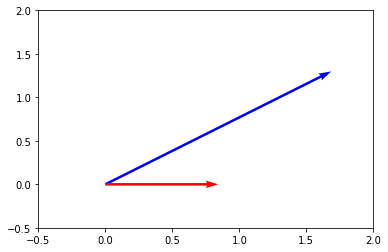

In [13]:
origin = np.array([[0, 0], [0, 0]])
# x-lim and y-lim
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)
plt.quiver(*origin, A[0, :], A[1, :], color=['blue', 'red'], units='xy',scale=1)

In [4]:
e_vals, e_vecs = np.linalg.eig(A)
print(e_vals)
print(e_vecs)

[ 2.41421356 -0.41421356]
[[ 0.92387953 -0.38268343]
 [ 0.38268343  0.92387953]]


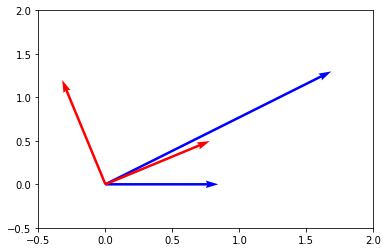

In [15]:
# plot eigen vecs
# x-lim and y-lim
plt.xlim(-0.5, 2)
plt.ylim(-0.5, 2)
plt.quiver(*origin, A[0,:], A[1, :], color=['blue', 'blue'], units='xy',scale=1)
plt.quiver(*origin, e_vecs[0,:], e_vecs[1,:], color=['red', 'red'], units='xy',scale=1)

In [6]:
A@e_vecs / e_vals

array([[ 0.92387953, -0.38268343],
       [ 0.38268343,  0.92387953]])

In [7]:
diff = A@e_vecs / e_vals - e_vecs
diff[np.abs(diff) < 1e-12] = 0
diff

array([[0., 0.],
       [0., 0.]])

In [8]:
e_vec_1 = e_vecs[:,0]
e_vec_1

array([0.92387953, 0.38268343])

In [9]:
e_val_1 = e_vals[0]
A@e_vec_1.T / e_val_1

array([0.92387953, 0.38268343])

## Spectral Theorm
Now lets create a Matrix from a predifined Eigen Vectors and Values using reverse of 

In [28]:
e_vecs = np.array([ [2,1], [-1,2] ])
# Now normalize
e_vecs = (e_vecs / np.linalg.norm(e_vecs, axis=-1)).T
print(e_vecs)

[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


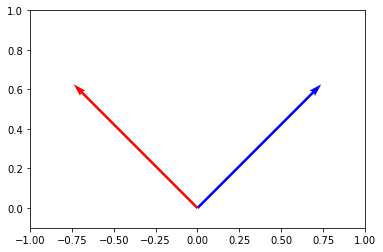

In [29]:
plt.xlim(-1, 1)
plt.ylim(-0.1, 1)
plt.quiver(*origin, eigen_vecs[0,:], eigen_vecs[1,:], color=['blue', 'red'], units='xy',scale=1)

In [30]:
e_vals = np.array([2,1])
np.diag(e_vals)

array([[2, 0],
       [0, 1]])

In [31]:
# Now lets create the matrix 
M = e_vecs@np.diag(e_vals)@e_vecs.T
print(M)

[[1.8 0.4]
 [0.4 1.2]]


In [32]:
np_e_vals ,np_e_vecs = np.linalg.eig(M)
print(np_e_vals)
print(np_e_vecs)

[2. 1.]
[[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]


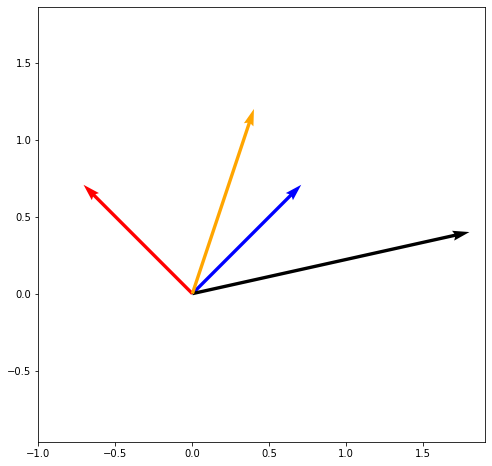

In [55]:
# Now lets plot every thing
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.xlim(-1, 1.9)
plt.ylim(-1, 1.9)
plt.quiver(*origin, eigen_vecs[0,:], eigen_vecs[1,:], color=['blue', 'red'], units='xy',scale=1)
plt.quiver(*origin, M[0,:], M[1,:], color=['black', 'orange'], units='xy',scale=1)

### Property 1 : Sum(eigen values) = Trace of matrix

In [56]:
np.sum(e_vals) , np.trace(M)

(3, 3.0)

###  Property 2 : Product of Eigen Values == Determinant

In [57]:
np.multiply(*e_vals) , np.linalg.det(M)

(2, 2.0)

### Theorem 
Suppose the matrix A has one eigenvalue $λ_1$, which is greater in absolute value than all other eigenvalues, 
and let $V_n+1 = A @ V_n$
Then, if the nonzero vectors $v_0$ and $u$ are chosen randomly, $(u.v_{n+1}) / (u.v_n)$ will converge to $λ_1$, with probability **1.0**

In [58]:
i = 0
eps = 1.0 # Epsilion to store the diff
prev_r = 0
v0 = np.random.random(2)
v = v0
print(f"Starting V : {v}")

while(abs(eps) > 1e-9):
    i += 1
    v1 = M@v.T
    r = np.dot(v,v1) / np.dot(v,v)
    eps = r - prev_r
    prev_r = r
    v = v1 / np.linalg.norm(v1)
    
print(f"Number of iterations:{i} \n v:{v} \n r:{r}")

Starting V : [0.8831362  0.98992539]
Number of iterations:16 
 v:[0.89442448 0.44721903] 
 r:1.9999999998525426


In [59]:
print(f"Normalized v : {v}")
print(f"Major Eigen Vec v : {e_vecs[:,0]}")

Normalized v : [0.89442448 0.44721903]
Major Eigen Vec v : [0.89442719 0.4472136 ]


**Theorem:**  Suppose the matrix A has one eigenvalue $λ_p$ that is closer to $p$ than all other eigenvalues, and let $(A − pI) v_{n+1} = v_n$ . Then, if the nonzero vectors $v_0$ and $u$ are chosen randomly, $u^Tv_n/u^Tv_{n+1} + p$ will converge to $λ_p$, with probability **one (1.0)**.

In [60]:
minor_eigen_value = np.trace(M) - r
print(minor_eigen_value)

1.0000000001474574


In [61]:
p = 0.5

In [62]:
F = np.linalg.inv(M - np.eye(2)*p)
i = 0
eps = 1.0
prev_z = 0
y0 = np.random.random(2)
y = y0
print(f"Starting Y : {y}")

while(i < 20):
    i += 1
    y1 = F@y.T
    z = (np.dot(y1,y) / np.dot(y1,y1)) + p
    eps = z - prev_z
    prev_z = z
    y = y1 / np.linalg.norm(y1)
    
print(f"Number of iterations:{i} \n eigenvec y :{y} \n eigen value z::{z}")

Starting Y : [0.86275764 0.24291329]
Number of iterations:20 
 eigenvec y :[ 0.4472136  -0.89442719] 
 eigen value z::1.0


In [ ]:
A

array([[2, 1],
       [1, 0]])